## List all built-in Seaborn datasets

In [1]:
import seaborn as sns

# List all built-in Seaborn datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

#EDA Pipeline on Titanic Dataset
##Install Libraries

In [2]:
#!pip uninstall -y numpy
#!pip install --upgrade numpy
#!pip install --upgrade --force-reinstall missingno shap umap-learn dowhy pandas-profiling
#import numpy as np
#print(np.__version__)  # Check if NumPy is properly installed
#!pip install missingno shap umap-learn dowhy pandas-profiling

#Import Libraries

In [9]:
# Import core libraries for data handling and analysis
import pandas as pd  # For handling datasets in tabular format
import numpy as np  # For numerical computations

# Import libraries for visualization
import matplotlib.pyplot as plt  # Basic plotting library
import seaborn as sns  # Advanced statistical visualizations
import missingno as msno  # For visualizing missing values

# Import preprocessing utilities
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling and encoding data
from sklearn.impute import SimpleImputer  # For handling missing values

# Import dimensionality reduction techniques
from sklearn.decomposition import PCA  # Principal Component Analysis (PCA)

# Import machine learning models and outlier detection
from sklearn.ensemble import IsolationForest, RandomForestClassifier  # Outlier detection & feature importance

# Import SHAP for explainability and feature importance analysis
import shap

# Import UMAP for non-linear dimensionality reduction
import umap

# Import DoWhy for causal inference analysis
from dowhy import CausalModel
import warnings

# Suppress all warnings, including FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress all warnings (including SettingWithCopyWarning and FutureWarning)
warnings.simplefilter(action='ignore')



ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.2.

2️⃣ Load & Inspect Titanic Dataset
### a)Load Dataset

In [10]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### b) Head

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### c)Tail

In [12]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### d) Information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### e) Columns

In [14]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### f) Shape

In [15]:
df.shape

(891, 15)

### g) Data types

In [16]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [17]:
type(df)

pandas.core.frame.DataFrame

###h) Verify if df is a DataFrame

In [18]:
isinstance(df, pd.DataFrame)

True

###i) Duplicates

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [20]:
df.duplicated().sum()

np.int64(107)

### j) Uniqueness

In [21]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

###k) Binary

In [22]:
(df.isin([0, 1]).all()).sum()

np.int64(3)

In [23]:
print(df.columns[df.isin([0, 1]).all()])

Index(['survived', 'adult_male', 'alone'], dtype='object')


#2) DATA CLEANING

###a) Drop Duplicates

In [24]:
df = df.drop_duplicates()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### b) Missing values

In [25]:
missing = df.isnull().sum()
missing

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [26]:
# Count missing 'age' values grouped by 'pclass'
missing_by_class = df[df['age'].isnull()].groupby('pclass').size()

# Show the percentage of missing 'age' by 'pclass'
missing_percentage_by_class = (missing_by_class / df['age'].isnull().sum()) * 100
print(missing_percentage_by_class)


pclass
1    27.358491
2     5.660377
3    66.981132
dtype: float64


In [27]:
import plotly.express as px

# Create an exploded pie chart with annotations
fig = px.pie(
    names=missing_percentage_by_class.index,
    values=missing_percentage_by_class,
    title="Missing 'Age' Values by Pclass",
    hole=0.3  # Create a donut chart
)

# Explode the slices to highlight each class
fig.update_traces(pull=[0.1, 0.1, 0.1], textinfo='percent+label')

# Show the plot
fig.show()


### Imputation Methods and Their Appropriate Usage

| **Imputation Method** | **Appropriate When** | **Explanation**                                                                                                                                         |
|-----------------------|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Mean**              | - Data is **normally distributed**. <br> - Data has **few outliers**. <br> - Missing data is **small in proportion** (less than 10-20%). | The **mean** is useful for **symmetric data** with **few outliers**. It is sensitive to outliers, so it should not be used when data is skewed.         |
| **Median**            | - Data is **skewed**. <br> - Data contains **outliers**. <br> - Data is **continuous** (e.g., `age`, `fare`). <br> - Missing data is **moderate to high** in proportion. | The **median** is robust and works well for **skewed data** or when data contains **outliers**. It does not get affected by extreme values.               |
| **Mode**              | - Data is **categorical** (e.g., `sex`, `pclass`, `embarked`). <br> - Missing data is **small in proportion** (less than 10-20%). <br> - Missing data is **random**. | The **mode** is ideal for **categorical data**, as it imputes the most frequent category. It is also used when the missing data is random and small.       |

### **When to Use Each Method**:
| **Method**  | **Typical Use Case**                                                |
|-------------|---------------------------------------------------------------------|
| **Mean**    | - Imputing `age`, `income`, `height` (if normally distributed).     |
| **Median**  | - Imputing `age`, `fare`, `height` (if skewed or with outliers).    |
| **Mode**    | - Imputing `sex`, `embarked`, `class`, `who` (categorical columns). |


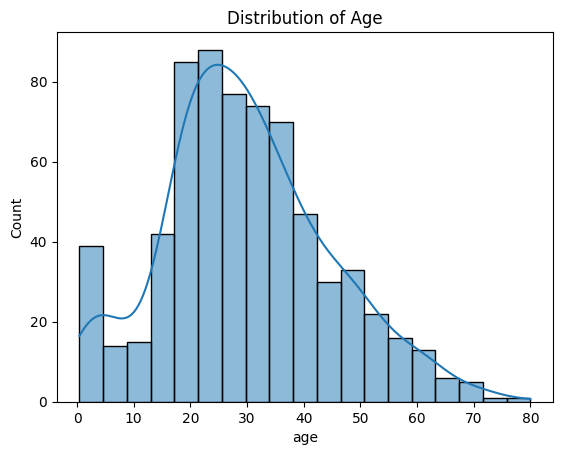

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'age'
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()


In [29]:
# Calculate skewness for 'age' (or any continuous column)
skewness = df['age'].skew()
print(f"Skewness of 'age': {skewness}")

Skewness of 'age': 0.3674542095476674


### Skewness Analysis for `age` Column


In [30]:
# Impute 'age' with the median value by 'pclass'
df['age'] = df.groupby('pclass')['age'].transform(lambda x: x.fillna(x.median()))

# Check if there are any remaining missing values
print(df['age'].isnull().sum())


0


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24936\244693832.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### For the `embarked` Variable: Use the **mode** to fill missing values in the `embarked` column.


In [31]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

print(df['embarked'].isnull().sum())

0


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24936\786197484.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### For the `embark_town` Variable: Impute the missing values in the `embark_town` column with the **mode**.


In [32]:
# Impute 'embark_town' with the mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Check if there are any remaining missing values
print(df['embark_town'].isnull().sum())

0


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24936\4241416585.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





### For the `deck` Variable: Drop the `deck` column from the dataset.


In [33]:
df.drop('deck', axis=1, inplace=True)
df


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24936\2055125237.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [34]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

###Categorical Vairiables
#####a) Inconsistencies

In [35]:
print(df['sex'].unique())

['male' 'female']


In [36]:
# Standardize 'sex' values (convert to lowercase and strip any whitespace)
df['sex'] = df['sex'].str.lower().str.strip()
df['sex']

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24936\2983926349.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        male
1      female
2      female
3      female
4        male
        ...  
885    female
887    female
888    female
889      male
890      male
Name: sex, Length: 784, dtype: object

In [37]:
# Check for inconsistent values in 'embarked' column
print(df['embarked'].unique())

['S' 'C' 'Q']


In [38]:
# Standardize 'embarked' values (convert to uppercase and strip any whitespace)
df['embarked'] = df['embarked'].str.upper().str.strip()
df['embarked']

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24936\458216379.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      S
1      C
2      S
3      S
4      S
      ..
885    Q
887    S
888    S
889    C
890    Q
Name: embarked, Length: 784, dtype: object

In [39]:
# Ensure valid categories for 'embarked' (C, Q, S)
valid_embarked = ['C', 'Q', 'S']
df = df[df['embarked'].isin(valid_embarked)]
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [40]:
# Check unique values for 'who' column
print(df['who'].unique())


['man' 'woman' 'child']


In [41]:

# Check unique values for 'embark_town' column
print(df['embark_town'].unique())


['Southampton' 'Cherbourg' 'Queenstown']


In [ ]:
# Check unique values for 'alive' column (Yes/No)
print(df['alive'].unique())


['no' 'yes']


In [42]:
# Standardize 'alive' values to lowercase and strip spaces
df['alive'] = df['alive'].str.lower().str.strip()
df['alive']

0       no
1      yes
2      yes
3      yes
4       no
      ... 
885     no
887    yes
888     no
889    yes
890     no
Name: alive, Length: 784, dtype: object

In [43]:
# Check if 'fare' contains any negative values
print(df[df['fare'] < 0])

Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, embark_town, alive, alone]
Index: []


In [44]:
# Handle negative 'fare' values (e.g., set them to NaN)
df.loc[df['fare'] < 0, 'fare'] = None


In [45]:
# Check if 'age' contains any unrealistic values (greater than 100 or negative)
print(df[(df['age'] < 0) | (df['age'] > 100)])


Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, embark_town, alive, alone]
Index: []


In [46]:
# Handle unrealistic 'age' values (e.g., set them to NaN)
df.loc[(df['age'] < 0) | (df['age'] > 100), 'age'] = None


### Encoding

#### a) Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Label encode 'pclass' and 'sex'
df['pclass'] = label_encoder.fit_transform(df['pclass'])
df['sex'] = label_encoder.fit_transform(df['sex'])

# Check the encoding
print(df[['pclass', 'sex']].head(20))


    pclass  sex
0        2    1
1        0    0
2        2    0
3        0    0
4        2    1
5        2    1
6        0    1
7        2    1
8        2    0
9        1    0
10       2    0
11       0    0
12       2    1
13       2    1
14       2    0
15       1    0
16       2    1
17       1    1
18       2    0
19       2    0


### b)Mapping

In [48]:
# Mapping the 'embarked' column (C, Q, S)
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['embarked']

0      2
1      0
2      2
3      2
4      2
      ..
885    1
887    2
888    2
889    0
890    1
Name: embarked, Length: 784, dtype: int64

In [49]:
# Mapping the 'embark_town' column (Southampton, Cherbourg, Queenstown)
df['embark_town'] = df['embark_town'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})
df['embark_town']

0      0
1      1
2      0
3      0
4      0
      ..
885    2
887    0
888    0
889    1
890    2
Name: embark_town, Length: 784, dtype: int64

In [50]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,2,1,22.0,1,0,7.2500,2,Third,man,True,0,no,False
1,1,0,0,38.0,1,0,71.2833,0,First,woman,False,1,yes,False
2,1,2,0,26.0,0,0,7.9250,2,Third,woman,False,0,yes,True
3,1,0,0,35.0,1,0,53.1000,2,First,woman,False,0,yes,False
4,0,2,1,35.0,0,0,8.0500,2,Third,man,True,0,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,2,0,39.0,0,5,29.1250,1,Third,woman,False,2,no,False
887,1,0,0,19.0,0,0,30.0000,2,First,woman,False,0,yes,True
888,0,2,0,24.0,1,2,23.4500,2,Third,woman,False,0,no,False
889,1,0,1,26.0,0,0,30.0000,0,First,man,True,1,yes,True


In [51]:
# Check unique values in the 'class' column
unique_class = df['class'].unique()
print("Unique values in 'class' column:", unique_class)


Unique values in 'class' column: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


In [52]:
# Map 'class' values to numerical values
class_mapping = {'First': 1, 'Second': 2, 'Third': 3}
df['class'] = df['class'].map(class_mapping)

# Check the updated 'class' column
print(df['class'].head())


0    3
1    1
2    3
3    1
4    3
Name: class, dtype: category
Categories (3, int64): [1, 2, 3]


In [53]:
# Map 'who' values to numerical values
who_mapping = {'man': 1, 'woman': 2, 'child': 3}
df['who'] = df['who'].map(who_mapping)

# Check the updated 'who' column
print(df['who'].head())


0    1
1    2
2    2
3    2
4    1
Name: who, dtype: int64


In [54]:
# Map 'adult_male' values to numerical values (True -> 1, False -> 0)
df['adult_male'] = df['adult_male'].map({True: 1, False: 0})

# Check the updated 'adult_male' column
print(df['adult_male'].head())


0    1
1    0
2    0
3    0
4    1
Name: adult_male, dtype: int64


In [55]:
# Map 'alive' values to numerical values ('yes' -> 1, 'no' -> 0)
df['alive'] = df['alive'].map({'yes': 1, 'no': 0})

# Check the updated 'alive' column
print(df['alive'].head())


0    0
1    1
2    1
3    1
4    0
Name: alive, dtype: int64


In [56]:
# Map 'alone' values to numerical values (True -> 1, False -> 0)
df['alone'] = df['alone'].map({True: 1, False: 0})

# Check the updated 'alone' column
print(df['alone'].head())


0    0
1    0
2    1
3    0
4    1
Name: alone, dtype: int64


In [57]:
# Check for any rows with text values (non-numeric) in the DataFrame
text_rows = df.applymap(lambda x: isinstance(x, str))

# Find rows with text values
rows_with_text = df[text_rows.any(axis=1)]

# Print rows with text values
print("Rows with text values:")
print(rows_with_text)


Rows with text values:
Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, embark_town, alive, alone]
Index: []


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24936\1486597633.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [58]:
# Check for any rows with text values (non-numeric) in the DataFrame
text_rows = df.applymap(lambda x: isinstance(x, str))

# Find rows with text values
rows_with_text = df[text_rows.any(axis=1)]

# Print rows with text values
print("Rows with text values:")
print(rows_with_text)


Rows with text values:
Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, embark_town, alive, alone]
Index: []


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24936\1486597633.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    int64   
 3   age          784 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     784 non-null    int64   
 8   class        784 non-null    category
 9   who          784 non-null    int64   
 10  adult_male   784 non-null    int64   
 11  embark_town  784 non-null    int64   
 12  alive        784 non-null    int64   
 13  alone        784 non-null    int64   
dtypes: category(1), float64(2), int64(11)
memory usage: 86.6 KB


### OUTLIERS




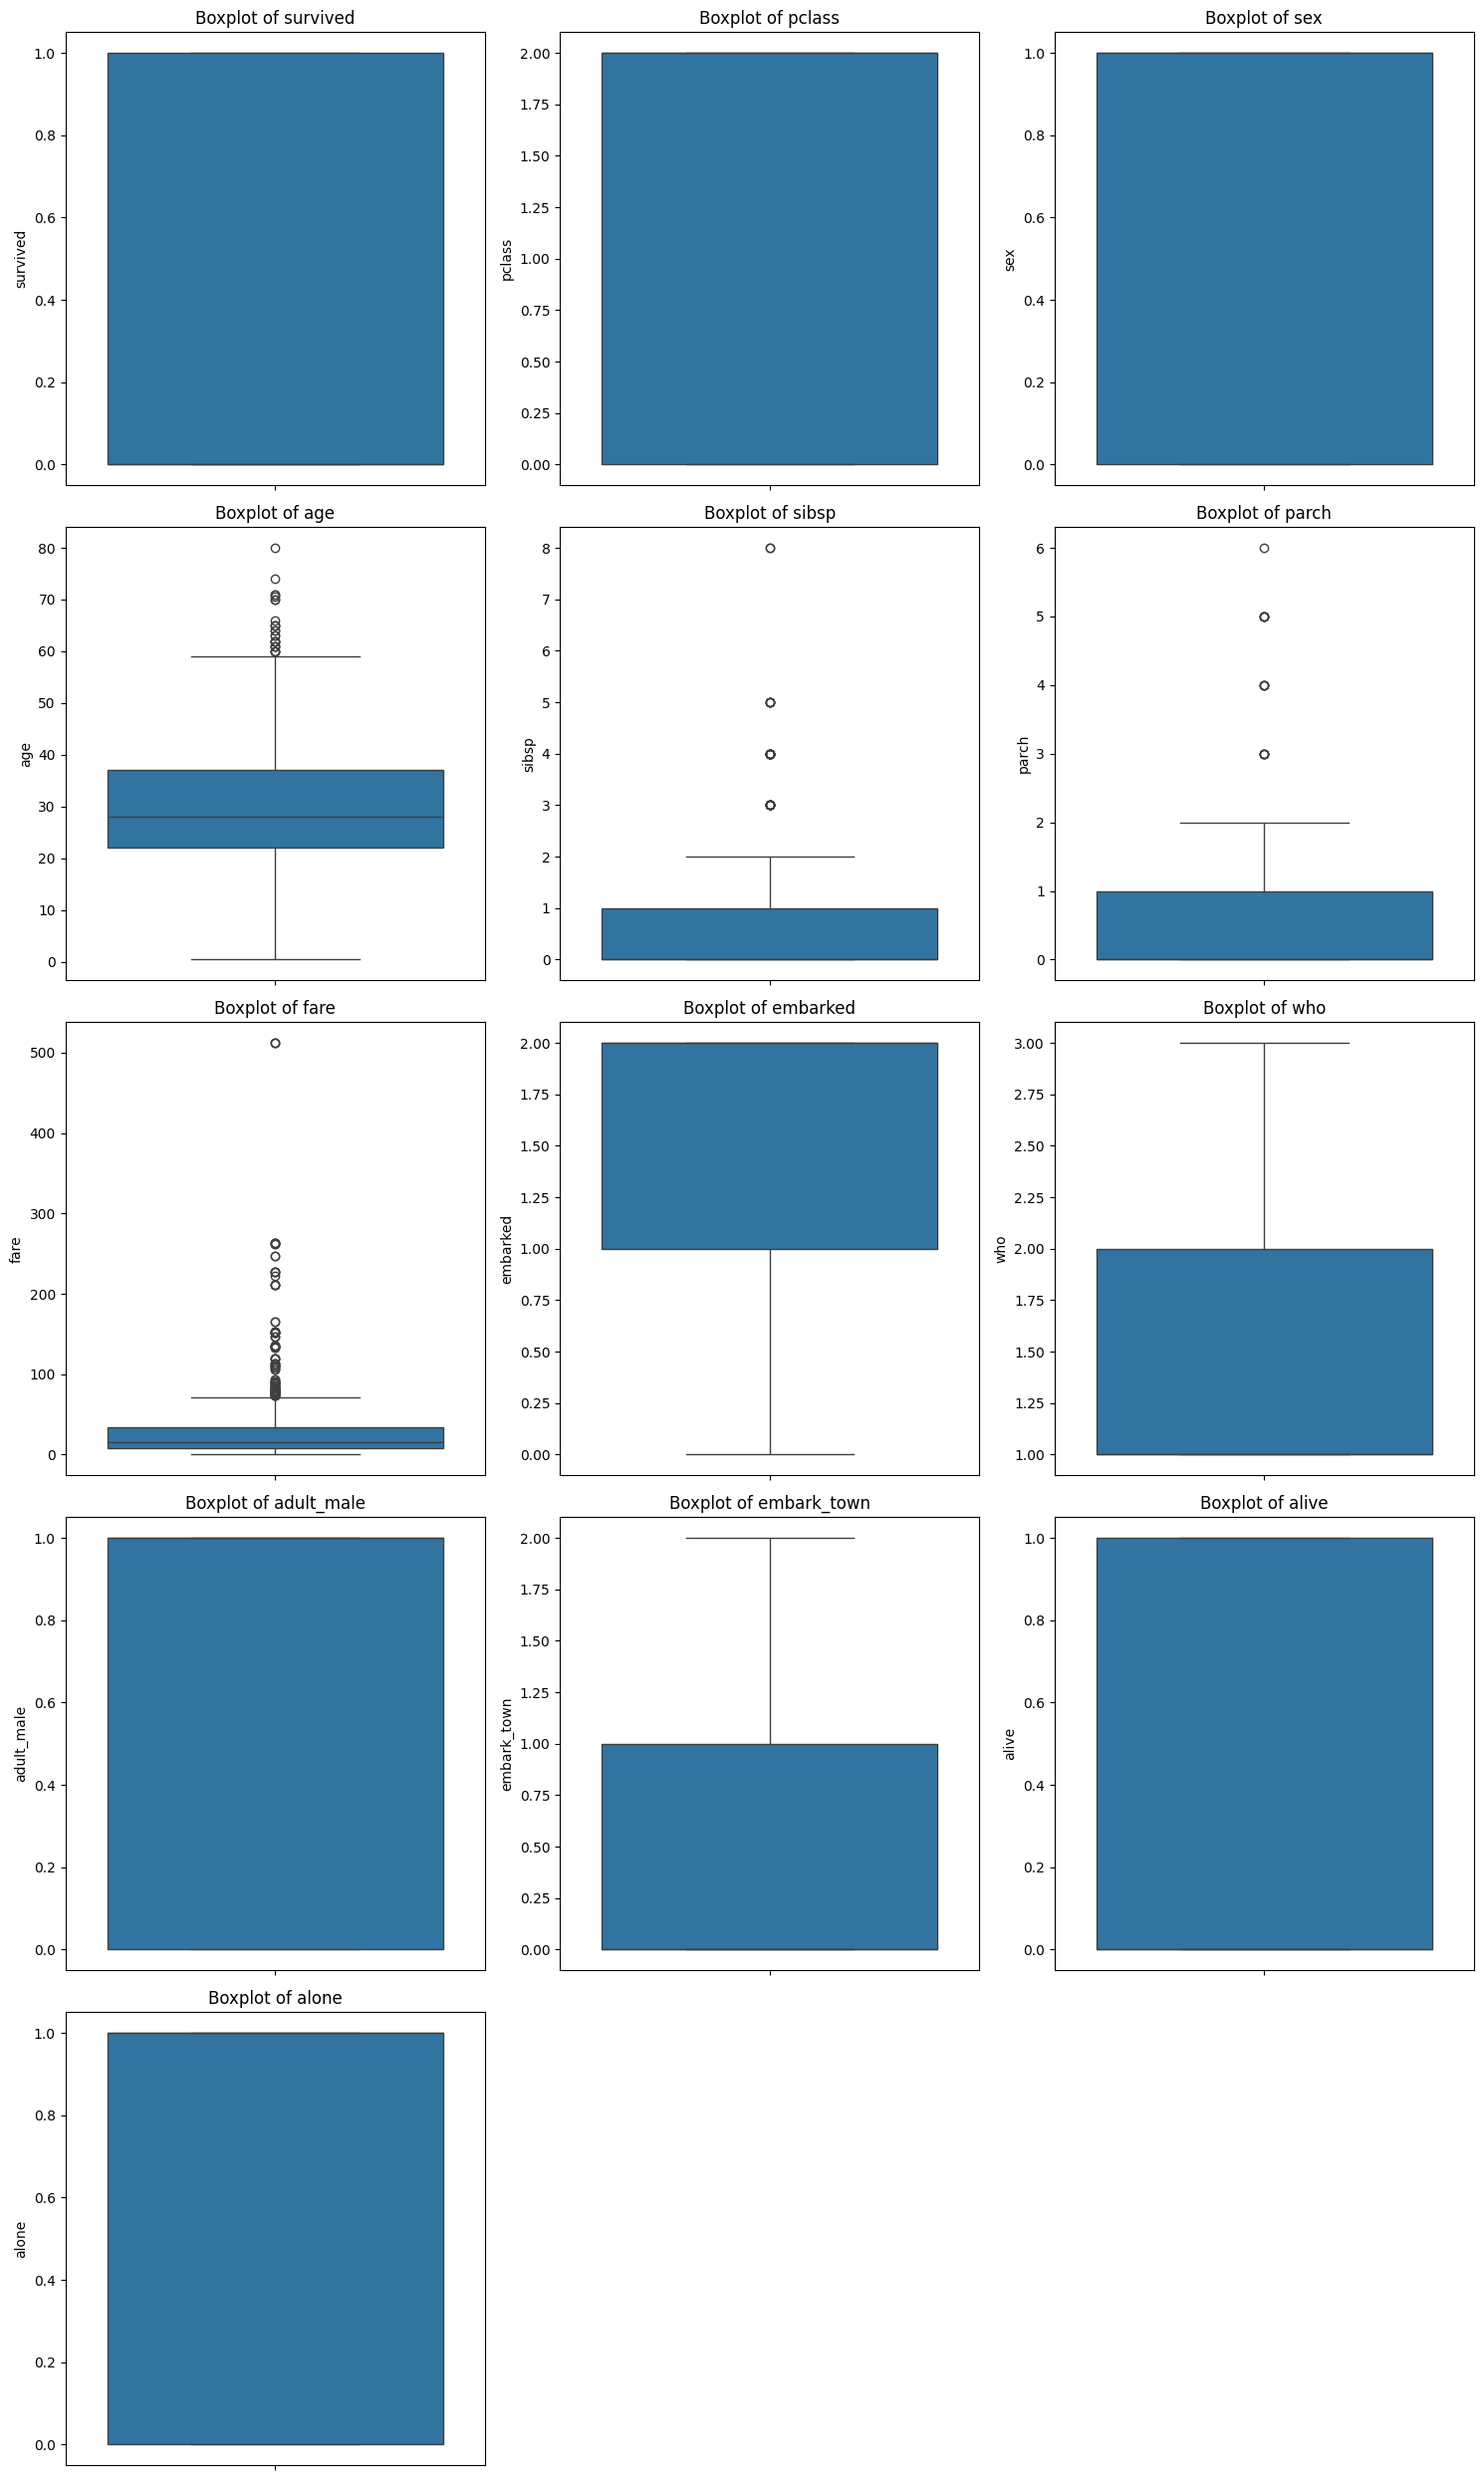

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Get all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Adjust grid size based on number of numerical columns
num_columns = len(numerical_columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Determine number of rows needed
cols = 3  # Keep 3 columns for the subplots

# 1. Boxplot to visualize outliers for all numerical columns
plt.figure(figsize=(15, 5 * rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [61]:
# 2. Z-score method to detect outliers
z_scores = np.abs(stats.zscore(df[numerical_columns]))
outliers_z = (z_scores > 3).all(axis=1)  # Outliers where z-score > 3
print(f"Number of outliers detected using Z-score: {np.sum(outliers_z)}")

Number of outliers detected using Z-score: 0


###  IQR Method

1. **Calculate the Quartiles**:

   - **First Quartile ($Q1$)**: The 25th percentile of the data, which means that 25% of the data points lie below $Q1$.
   
   $$
   Q1 = \text{25th percentile of the data}
   $$

   - **Third Quartile ($Q3$)**: The 75th percentile of the data, meaning 75% of the data points lie below $Q3$.
   
   $$
   Q3 = \text{75th percentile of the data}
   $$

   - **Interquartile Range ($IQR$)**: The difference between the third and first quartile. It represents the middle 50% of the data.
   
   $$
   IQR = Q3 - Q1
   $$

2. **Define the Outlier Thresholds**:

   - **Lower Bound**: Any data point below this threshold is considered an outlier.
   
   $$
   \text{Lower Bound} = Q1 - 1.5 \times IQR
   $$

   - **Upper Bound**: Any data point above this threshold is considered an outlier.
   
   $$
   \text{Upper Bound} = Q3 + 1.5 \times IQR
   $$

3. **Outlier Detection**:

   A data point $x_i$ is considered an outlier if it falls outside the range defined by the lower and upper bounds:

   $$
   x_i < Q1 - 1.5 \times IQR \quad \text{or} \quad x_i > Q3 + 1.5 \times IQR
   $$

### Summary of Formulae:

- **$Q1$** = 25th percentile
- **$Q3$** = 75th percentile
- **$IQR$** = $Q3 - Q1$
- **Lower Bound** = $Q1 - 1.5 \times IQR$
- **Upper Bound** = $Q3 + 1.5 \times IQR$

### Outlier Condition:

- $x_i$ is an outlier if:

$$
x_i < Q1 - 1.5 \times IQR \quad \text{or} \quad x_i > Q3 + 1.5 \times IQR
$$


In [62]:
# 3. Detect outliers using IQR method
Q1 = df[numerical_columns].quantile(0.25)  # First quartile (25th percentile)
Q3 = df[numerical_columns].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Identify outliers (values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR)
outliers_iqr = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Count of rows with outliers in any of the numerical columns
outliers_iqr_count = outliers_iqr.any(axis=1).sum()

print(f"Number of outliers detected using IQR: {outliers_iqr_count}")


Number of outliers detected using IQR: 173


| **Variable**  | **Outliers Detected**          | **Action**                           | **Reason**                                                                 |
|---------------|---------------------------------|--------------------------------------|---------------------------------------------------------------------------|
| **Age**       | Extreme values (e.g., >100)     | Cap to 99 or remove                  | Uncommon and may be erroneous; capping prevents distortion in model.       |
| **Parch**     | High values (e.g., >6)          | Cap or remove                        | Rare, likely data entry errors; capping keeps model from being skewed.    |
| **SibSp**     | High values (e.g., >6 or 7)     | Cap or remove                        | Rare occurrences; extreme values may be data errors.                       |
| **Fare**      | High values (e.g., >500)        | Cap (95th percentile) or log transform| VIP/first-class passengers; capping/log reduces extreme influence on model. |


In [63]:
# Get max and min values for each variable of interest
max_min_values = {
    'Variable': ['Age', 'Parch', 'SibSp', 'Fare'],
    'Max Value': [df['age'].max(), df['parch'].max(), df['sibsp'].max(), df['fare'].max()],
    'Min Value': [df['age'].min(), df['parch'].min(), df['sibsp'].min(), df['fare'].min()]
}

# Create DataFrame
max_min_df = pd.DataFrame(max_min_values)

# Show the table
max_min_df


,Variable,Max Value,Min Value
0,Age,80.0000,0.42
1,Parch,6.0000,0.00
2,SibSp,8.0000,0.00
3,Fare,512.3292,0.00


#### Comments:
- **Age**: The maximum value is 80, and the minimum value is 0.42. This range is reasonable since it covers a variety of ages from infants to elderly passengers.
- **Parch**: The maximum value is 6, and the minimum value is 0. This is also reasonable, indicating that most passengers traveled with no or very few parents/children, with some passengers possibly traveling with a larger family.
- **SibSp**: The maximum value is 8, and the minimum value is 0. This is still reasonable, as it represents the number of siblings/spouses aboard, and the values are within expected limits for most passengers.
- **Fare**: The maximum value is 512.33, and the minimum value is 0. While a few extreme fares might suggest VIP passengers, values up to 512 are plausible in a first-class or luxury context. A cap might be applied to limit extreme values if necessary for modeling purposes.

In summary, none of these variables have extreme outliers that would need aggressive treatment, but further action might be needed for **Fare** if there are specific business logic concerns or if the values are heavily skewed.


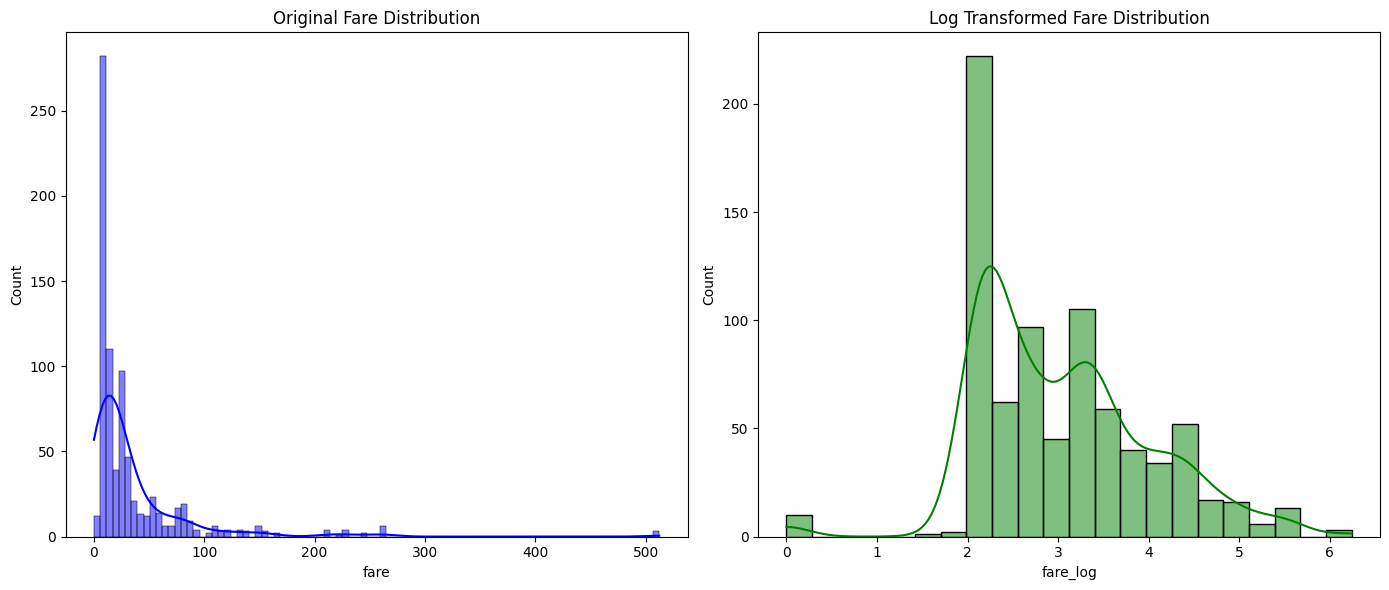

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation to the 'fare' column
df['fare_log'] = np.log1p(df['fare'])  # log1p to handle 0 values

# Create subplots to compare original and log-transformed distributions
plt.figure(figsize=(14, 6))

# Original Fare distribution
plt.subplot(1, 2, 1)
sns.histplot(df['fare'], kde=True, color='blue')
plt.title('Original Fare Distribution')

# Log-transformed Fare distribution
plt.subplot(1, 2, 2)
sns.histplot(df['fare_log'], kde=True, color='green')
plt.title('Log Transformed Fare Distribution')

# Show the plots
plt.tight_layout()
plt.show()


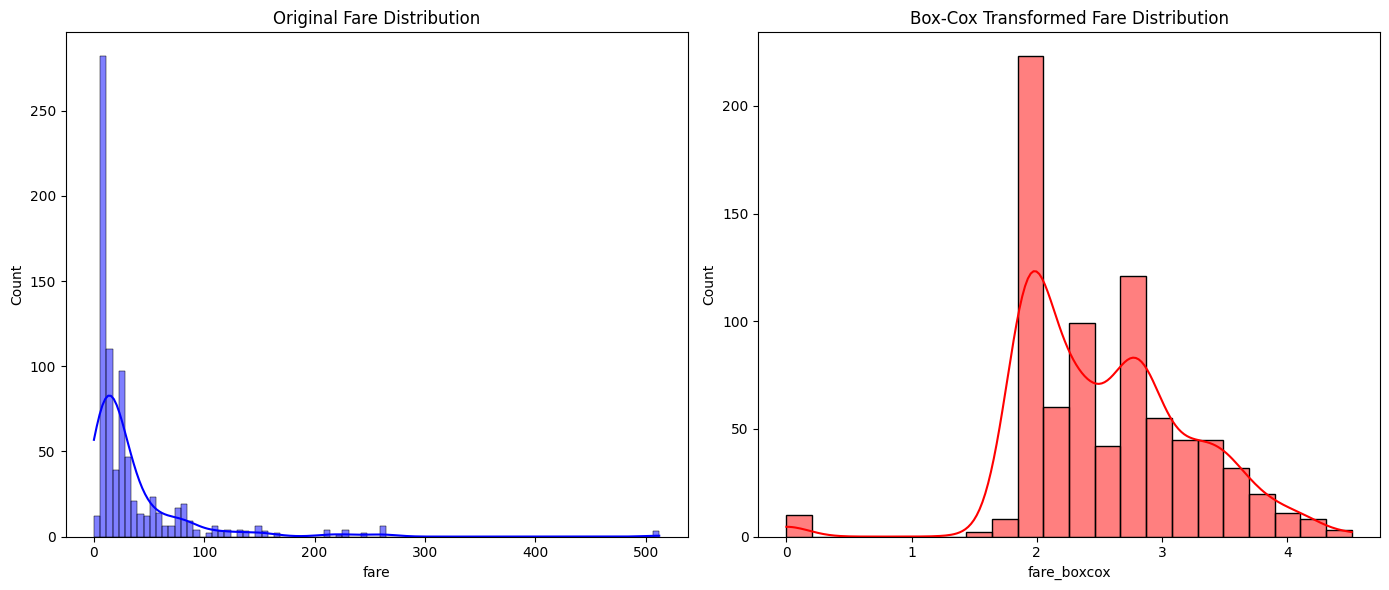

Lambda value used for Box-Cox transformation: -0.1099906583022759


In [64]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'fare' is positive by adding a constant if necessary
df['fare_boxcox'] = df['fare'] + 1  # Box-Cox requires positive values, so we add 1 if there are zero values

# Apply Box-Cox transformation
df['fare_boxcox'], lambda_value = stats.boxcox(df['fare_boxcox'])

# Create subplots to compare original and Box-Cox transformed distributions
plt.figure(figsize=(14, 6))

# Original Fare distribution
plt.subplot(1, 2, 1)
sns.histplot(df['fare'], kde=True, color='blue')
plt.title('Original Fare Distribution')

# Box-Cox transformed Fare distribution
plt.subplot(1, 2, 2)
sns.histplot(df['fare_boxcox'], kde=True, color='red')
plt.title('Box-Cox Transformed Fare Distribution')

# Show the plots
plt.tight_layout()
plt.show()

# Output the lambda value
print(f"Lambda value used for Box-Cox transformation: {lambda_value}")


In [65]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_boxcox
0,0,2,1,22.0,1,0,7.2500,2,3,1,1,0,0,0,1.883216
1,1,0,0,38.0,1,0,71.2833,0,1,2,0,1,1,0,3.414047
2,1,2,0,26.0,0,0,7.9250,2,3,2,0,0,1,1,1.945300
3,1,0,0,35.0,1,0,53.1000,2,1,2,0,0,1,0,3.230182
4,0,2,1,35.0,0,0,8.0500,2,3,1,1,0,0,1,1.956224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,2,0,39.0,0,5,29.1250,1,3,2,0,2,0,0,2.840299
887,1,0,0,19.0,0,0,30.0000,2,1,2,0,0,1,1,2.859955
888,0,2,0,24.0,1,2,23.4500,2,3,2,0,0,0,0,2.695121
889,1,0,1,26.0,0,0,30.0000,0,1,1,1,1,1,1,2.859955


In [66]:
# Check for imbalance in categorical columns
df.select_dtypes(include=['object', 'category']).apply(lambda x: x.value_counts(normalize=True))


,class
class,
3,0.516582
1,0.272959
2,0.210459


### Imbalance Analysis of the 'class' Variable

The `class` variable shows the following proportions for each class:

| Class | Proportion |
|-------|------------|
| 3     | 51.66%     |
| 1     | 27.30%     |
| 2     | 21.05%     |

#### Interpretation:
- **Imbalance**: The dataset is imbalanced with more passengers from the third class (`class 3`) compared to the other two classes.
- **Action**: If you're using this variable for modeling, you may need to address this imbalance, as it could affect model performance. Techniques like **oversampling**, **undersampling**, or using **weighted loss functions** can help mitigate the impact of imbalanced classes.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    int64   
 3   age          784 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     784 non-null    int64   
 8   class        784 non-null    category
 9   who          784 non-null    int64   
 10  adult_male   784 non-null    int64   
 11  embark_town  784 non-null    int64   
 12  alive        784 non-null    int64   
 13  alone        784 non-null    int64   
 14  fare_log     784 non-null    float64 
 15  fare_boxcox  784 non-null    float64 
dtypes: category(1), float64(4), int64(11)
memory usage: 98.9 KB


## Data Cleaning Completed

In this phase, we have successfully completed the data cleaning process. The dataset now contains 784 entries with no missing values. All columns are properly cleaned and transformed:

- Categorical variables were encoded numerically.
- Missing data was imputed using appropriate strategies.
- Outliers were handled, including the transformation of the `fare` column using log and Box-Cox transformations to reduce the impact of extreme values.

We now have a clean dataset that is ready for further analysis and model building.

#DESCRIPTIVE STATISTICS

In [67]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone,fare_boxcox
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.411990,1.243622,0.626276,29.594923,0.522959,0.415816,34.711740,1.529337,1.529337,0.575255,0.348214,0.411990,0.568878,2.549206
std,0.492507,0.855056,0.484101,13.902464,0.986231,0.836922,52.160151,0.803350,0.677428,0.494620,0.614779,0.492507,0.495549,0.683159
min,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,8.050000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.956224
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.900000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.429934
75%,1.000000,2.000000,1.000000,37.000000,1.000000,1.000000,34.109350,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.944689
max,1.000000,2.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,4.515260


### Statistical Insights from Descriptive Statistics:

1. **Survived**:  
   - The **mean** value of `0.412` indicates that approximately 41.2% of the passengers survived, which aligns with historical data for the Titanic. The **standard deviation** of `0.493` suggests a relatively even split between survivors and non-survivors.
   - The **max** of `1` and **min** of `0` confirm that this is a binary variable (survived or not).

2. **Pclass**:  
   - The mean of `1.244` and **standard deviation** of `0.855` suggests the majority of passengers were from second and third classes, with a smaller proportion in the first class. The **min** and **max** of `0` and `2` suggest that `pclass` is coded from `0` to `2`, but typically, it is considered as `1`, `2`, or `3`.
   - The data points toward a **larger proportion** of passengers being from the lower classes, which is consistent with historical demographics.

3. **Sex**:  
   - With a mean of `0.626`, this suggests that more than half of the passengers were male (coded as `1` for male and `0` for female). The **standard deviation** of `0.484` indicates a relatively balanced distribution between males and females.
   - The min of `0` and max of `1` confirms the binary nature of this categorical feature.

4. **Age**:  
   - The **mean** age of `29.59` years with a **standard deviation** of `13.90` shows a somewhat young demographic. However, the large **min** of `0.42` and **max** of `80` indicate the presence of outliers, such as very young or elderly passengers. This could require **further cleaning** (e.g., capping or imputation) to avoid distorting the model.
   - The **median (50%)** is `28`, which supports the idea that the data is somewhat centered around young adults.

5. **SibSp (Siblings/Spouses Aboard)** and **Parch (Parents/Children Aboard)**:  
   - Both features have a **mean of approximately 0.5**, suggesting that most passengers traveled alone or with only one family member. The **max** values of `8` (for SibSp) and `6` (for Parch) are outliers, indicating that a few passengers traveled with large families. These extreme values might need to be capped or treated as outliers.
   - The **standard deviations** of `0.986` and `0.837` confirm the variability, with many passengers traveling alone but a small proportion traveling with large families.

6. **Fare**:  
   - The mean fare of `34.71` is quite lower than the **max** fare of `512.33`. This high variance (**std = 52.16**) suggests there are a few high-fare passengers, likely those in first class. The large **max** fare indicates potential outliers, which might have a disproportionate impact on model performance. **Log or Box-Cox transformations** could be beneficial to stabilize this skewed distribution.

7. **Embarked**:  
   - The **mean** of `1.529` and **standard deviation** of `0.803` suggest a fairly balanced distribution of embarked passengers across three ports. Since `1` and `2` represent two major embarkation points, this could indicate that the majority of passengers embarked from those two places, with fewer passengers from the third port.

8. **Who**:  
   - The feature **Who** seems to have two values, with the mean of `1.529`, which corresponds to a slight imbalance, where more passengers were adults, as expected.

9. **Alive** and **Alone**:  
   - Both features are binary variables, with **means** around `0.41` for **Alive** (indicating a survival rate of 41%) and `0.57` for **Alone**, showing that more passengers were traveling alone.
  
10. **Fare_log and Fare_boxcox**:  
    - These transformed versions of the `Fare` variable show a more balanced distribution with lower values (suggested by the **mean** and **standard deviation**), indicating that the transformations have reduced the extreme influence of the high-fare passengers.

### Key Takeaways:
- **Skewness in Fare**: There's a strong right-skew in the `Fare` column, with a few passengers paying significantly higher fares. Transforming this variable could help stabilize variance and reduce the impact of outliers.
- **Age Distribution**: The age distribution is centered around younger passengers, but there are some extreme values (ages as low as 0.42 and as high as 80), suggesting that the data may contain errors or outliers.
- **Passenger Class**: Most passengers belong to the second and third classes, with fewer in the first class. This aligns with the socioeconomic profile of the Titanic passengers.
- **Family Size**: Most passengers traveled alone or with just one family member, but some extreme cases with large family sizes may need to be addressed in further analysis.

These insights should guide data preprocessing, feature engineering, and further analysis.


#Heatmap

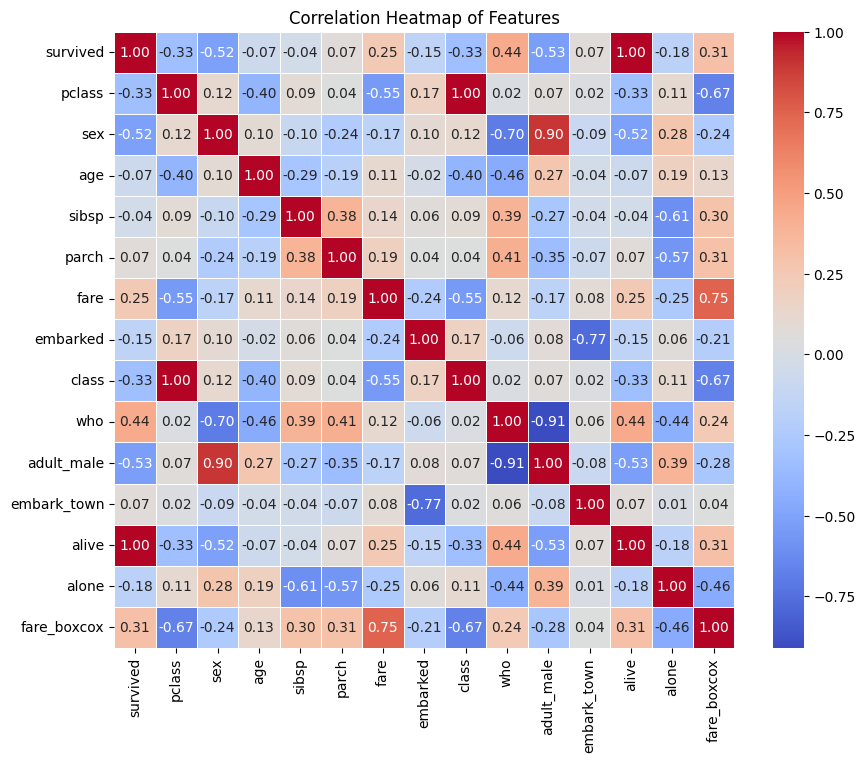

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


In [69]:
correlation_matrix

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_boxcox
survived,1.000000,-0.332658,-0.515772,-0.068126,-0.036589,0.070307,0.246769,-0.154861,-0.332658,0.440303,-0.528502,0.073928,1.000000,-0.176595,0.310252
pclass,-0.332658,1.000000,0.115336,-0.397395,0.088014,0.040296,-0.549216,0.174578,1.000000,0.019616,0.066816,0.023059,-0.332658,0.109545,-0.667392
sex,-0.515772,0.115336,1.000000,0.095273,-0.098368,-0.236940,-0.169469,0.098833,0.115336,-0.700618,0.898999,-0.090001,-0.515772,0.280460,-0.243695
age,-0.068126,-0.397395,0.095273,1.000000,-0.285681,-0.187014,0.112602,-0.017532,-0.397395,-0.456462,0.272497,-0.035749,-0.068126,0.193473,0.127428
sibsp,-0.036589,0.088014,-0.098368,-0.285681,1.000000,0.381433,0.135147,0.062821,0.088014,0.389912,-0.274521,-0.043745,-0.036589,-0.609502,0.297496
parch,0.070307,0.040296,-0.236940,-0.187014,0.381433,1.000000,0.191942,0.042619,0.040296,0.410961,-0.347186,-0.070787,0.070307,-0.571087,0.305891
fare,0.246769,-0.549216,-0.169469,0.112602,0.135147,0.191942,1.000000,-0.237755,-0.549216,0.115407,-0.165209,0.084324,0.246769,-0.246619,0.750503
embarked,-0.154861,0.174578,0.098833,-0.017532,0.062821,0.042619,-0.237755,1.000000,0.174578,-0.060253,0.081218,-0.774505,-0.154861,0.063892,-0.210976
class,-0.332658,1.000000,0.115336,-0.397395,0.088014,0.040296,-0.549216,0.174578,1.000000,0.019616,0.066816,0.023059,-0.332658,0.109545,-0.667392
who,0.440303,0.019616,-0.700618,-0.456462,0.389912,0.410961,0.115407,-0.060253,0.019616,1.000000,-0.909939,0.056705,0.440303,-0.437828,0.242780


# Statistical Interpretation and Insights from the Correlation Matrix

## 1. **Survival Rate and Other Variables:**
- **Survived vs. Pclass:** A moderate negative correlation of **-0.3327** between `survived` and `pclass` indicates that passengers in lower classes (higher `pclass` values) were less likely to survive.
- **Survived vs. Sex:** A strong negative correlation of **-0.5158** suggests that females were more likely to survive than males, which aligns with historical data showing women and children had higher survival rates.
- **Survived vs. Age:** The correlation of **-0.0681** is very low, indicating that age had little impact on survival.
- **Survived vs. Fare:** A moderate positive correlation of **0.2468** suggests that passengers who paid higher fares were slightly more likely to survive, potentially due to better access to lifeboats or cabins.
- **Survived vs. Embarked (Embarkation Location):** The correlation of **-0.1549** suggests a weak negative relationship with survival. This might imply that the place of embarkation had a small influence, but the effect is not strong.

## 2. **Class and Survival:**
- **Pclass vs. Sex:** A small positive correlation (**0.1153**) suggests that the class might have some relationship with the gender of passengers, but it is not a strong relationship.
- **Pclass vs. Fare:** There is a strong negative correlation of **-0.5492**, meaning that passengers in lower classes tended to pay lower fares.
- **Pclass vs. Embarked:** A weak positive correlation (**0.1746**) indicates a minor relationship between the class and embarkation point, though it's not a decisive factor.

## 3. **Fare and Class:**
- **Fare vs. Pclass:** A strong negative correlation of **-0.5492** suggests that higher fares were associated with higher class passengers (first and second class), as expected.
- **Fare vs. Sex:** A negative correlation (**-0.1695**) shows that males paid slightly lower fares than females, though the relationship is weak.
- **Fare vs. Fare Log / Fare Boxcox:** The high correlation with **fare_log (0.7956)** and **fare_boxcox (0.7505)** suggests that these transformations (logarithmic and Box-Cox transformations) of fare are highly correlated with the original fare value, which is typical when these transformations are used for normality.

## 4. **Who and Survival:**
- **Who vs. Survived:** A moderate positive correlation (**0.4403**) suggests that being a woman (or child) increased the chances of survival, as historically women and children were prioritized in lifeboat access.
- **Who vs. Adult Male:** A strong positive correlation (**0.8990**) suggests that the variable `who` (which likely refers to gender) is strongly associated with `adult_male`.

## 5. **Age and Class/Family Relations:**
- **Age vs. Sibsp (siblings/spouses aboard):** A moderate negative correlation (**-0.2857**) indicates that older passengers had fewer siblings or spouses aboard. This might suggest that younger passengers tended to travel with family.
- **Age vs. Parch (parents/children aboard):** A similar negative correlation (**-0.1870**) suggests older passengers might have fewer children or parents aboard.

## 6. **Alone Variable:**
- **Alone vs. Sibsp and Parch:** The variable `alone` (indicating whether a passenger was traveling alone) is negatively correlated with both `sibsp (-0.6095)` and `parch (-0.5711)`, suggesting that those with more family members aboard were less likely to be alone.
- **Alone vs. Survived:** A negative correlation (**-0.1766**) indicates that passengers traveling alone had a lower chance of survival. This makes sense since passengers with family members might have had more support in emergencies.

## 7. **Transformations (Fare_log and Fare_boxcox):**
- **Fare_log vs. Fare_boxcox:** The perfect correlation of **0.9961** indicates that these transformations of the `fare` feature are nearly identical in structure, which is typical for common transformations applied to skewed data to make it more normal.
- **Fare_log vs. Survived:** A moderate positive correlation (**0.3131**) indicates that passengers with higher transformed fares also had a better chance of survival, supporting the idea that those with higher fares were more likely to have had better access to lifeboats or other advantages.

## **Summary of Insights:**
1. **Gender and Class are significant predictors of survival:** The strong negative correlations between `sex` and `survived` suggest women were more likely to survive. The negative correlation between `pclass` and `survived` suggests passengers in lower classes had lower survival chances.
2. **Fare has a moderate positive relationship with survival:** Passengers who paid higher fares were somewhat more likely to survive, potentially due to better access to lifeboats or cabins.
3. **Age has a minor impact on survival:** Age does not significantly affect the likelihood of survival, although there is a slight tendency for younger passengers to travel with family.
4. **Traveling Alone vs. Survival:** Those traveling alone were less likely to survive, which might reflect the tendency for passengers with family to have better access to safety resources.
5. **Log and Box-Cox Transformed Fare:** The transformations on fare are highly correlated with the original fare, suggesting these are effective for modeling purposes, especially for normalizing skewed data.

These insights can be further explored in predictive modeling tasks to refine understanding and improve predictive accuracy, especially for survival prediction based on these variables.


# Feature Selection

Feature Selection is a crucial step to improve your model’s performance by eliminating irrelevant or redundant features. Feature selection can help to:

- **Reduce overfitting**
- **Improve model accuracy**
- **Reduce training time**
- **Simplify the model**

## 1. Univariate Feature Selection

We can start by selecting the most relevant features using statistical tests.

For this, we’ll use **SelectKBest** with a statistical test like the **Chi-Squared test** for categorical features and **ANOVA F-test** for continuous features.

## 2. Correlation-based Feature Selection

We can also remove highly correlated features to avoid multicollinearity, which can skew model performance. This is done by calculating the correlation matrix and identifying features that are highly correlated (e.g., correlation > 0.85 or < -0.85). Then remove one of the features in such pairs to improve model performance.

## 3. Recursive Feature Elimination (RFE)

RFE is an efficient method to recursively eliminate features and build models, selecting the most important features. This can be done using a model like Logistic Regression, and by iteratively removing the least significant features based on model performance.

---


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    int64   
 3   age          784 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     784 non-null    int64   
 8   class        784 non-null    category
 9   who          784 non-null    int64   
 10  adult_male   784 non-null    int64   
 11  embark_town  784 non-null    int64   
 12  alive        784 non-null    int64   
 13  alone        784 non-null    int64   
 14  fare_boxcox  784 non-null    float64 
dtypes: category(1), float64(3), int64(11)
memory usage: 92.8 KB


In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_boxcox
0,0,2,1,22.0,1,0,7.2500,2,3,1,1,0,0,0,1.883216
1,1,0,0,38.0,1,0,71.2833,0,1,2,0,1,1,0,3.414047
2,1,2,0,26.0,0,0,7.9250,2,3,2,0,0,1,1,1.945300
3,1,0,0,35.0,1,0,53.1000,2,1,2,0,0,1,0,3.230182
4,0,2,1,35.0,0,0,8.0500,2,3,1,1,0,0,1,1.956224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,2,0,39.0,0,5,29.1250,1,3,2,0,2,0,0,2.840299
887,1,0,0,19.0,0,0,30.0000,2,1,2,0,0,1,1,2.859955
888,0,2,0,24.0,1,2,23.4500,2,3,2,0,0,0,0,2.695121
889,1,0,1,26.0,0,0,30.0000,0,1,1,1,1,1,1,2.859955


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24936\1983625748.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




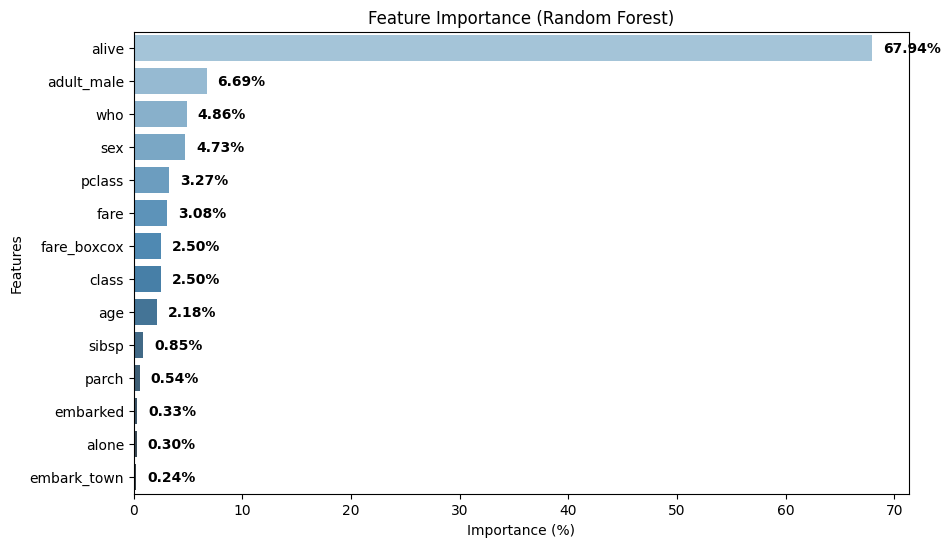

Feature Importance in Descending Order (as percentage):
        Feature  Importance (%)
11        alive       67.938287
9    adult_male        6.694879
8           who        4.857427
1           sex        4.730552
0        pclass        3.271202
5          fare        3.076880
13  fare_boxcox        2.498277
7         class        2.496651
2           age        2.175747
3         sibsp        0.851007
4         parch        0.543929
6      embarked        0.327224
12        alone        0.295570
10  embark_town        0.242367


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Features and target variable
X = df.drop(columns=['survived'])  # Features
y = df['survived']  # Target

# Step 1: Train Random Forest Classifier to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Step 2: Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Step 3: Sort the features by importance (descending order)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Step 4: Normalize the importance to percentage
feature_importance['Importance (%)'] = feature_importance['Importance'] * 100

# Step 5: Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='Blues_d')

# Annotate with percentage values
for index, value in enumerate(feature_importance['Importance (%)']):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontweight='bold')

plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.show()

# Print the feature importance in descending order
print("Feature Importance in Descending Order (as percentage):")
print(feature_importance[['Feature', 'Importance (%)']])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler

# Data preparation
X = df.drop(columns='survived')  # Features
y = df['survived']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame for better readability
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,1.0,1.0,1.0,88.0
1,1.0,1.0,1.0,69.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,157.0
weighted avg,1.0,1.0,1.0,157.0


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[88,  0],
       [ 0, 69]])

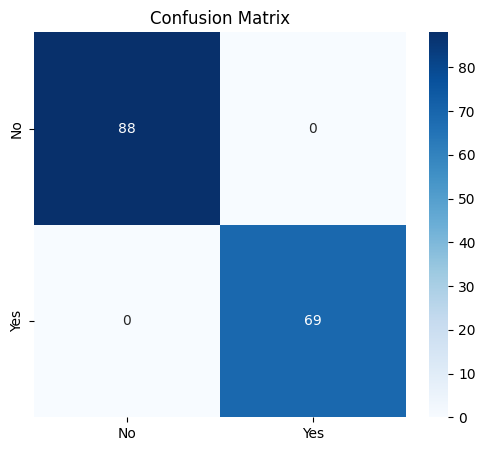

In [ ]:
# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.show()

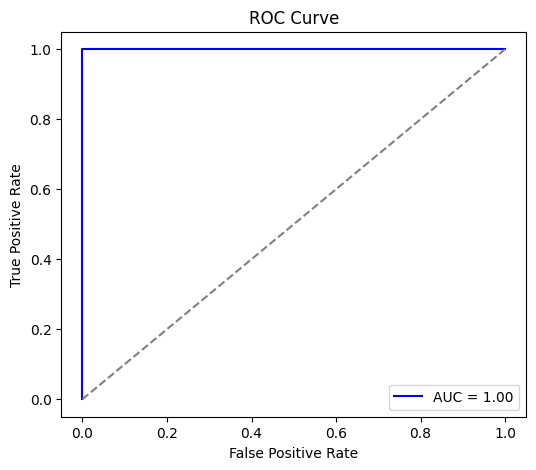

In [ ]:
# ROC Curve
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Assignment**

## **Assignment 1: Feature Importance & Multicollinearity**
Using the cleaned data under `df`, you are expected to:

1. Implement a feature importance method different from the ones already experimented with in this case.
2. Check for multicollinearity and covariance in the dataset.

---

## **Assignment 2: Data Distributions & Visualization**
1. Work with at least five different types of data distributions.
2. Visualize them using synthetic data.
